In [1]:
import mesa
from mesa import Model, Agent
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/oyama-kenshin/Desktop/Vault/05_Codes/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class DataProvider(Agent):
    def __init__(self, model):
        super().__init__(model)
        self.data = 100
        self.wealth = 0

    def step(self):
        # Provider-specific behavior (e.g., generate data or update state)
        pass

class DataConsumer(Agent):
    def __init__(self, model):
        super().__init__(model)
        self.data = 0
        self.wealth = 10

    def consume_data(self):
        """Consumes data from a random provider."""
        if self.wealth > 0:
            if not self.model.providers:
                return
            provider = self.random.choice(self.model.providers)
            if provider.data > 0:
                provider.data -= 1
                self.data += 1
                self.wealth -= 1
                provider.wealth += 1
        else:
            return

class DataMarket(Model):
    """
    A simple data market model using Mesa's AgentSet API.

    References:
        Mesa Overview: https://mesa.readthedocs.io/latest/overview.html
    """
    def __init__(self, num_providers, num_consumers, seed=None):
        super().__init__(seed=seed)
        self.num_providers = num_providers
        self.num_consumers = num_consumers

        self.providers = DataProvider.create_agents(model=self, n=self.num_providers)
        self.consumers = DataConsumer.create_agents(model=self, n=self.num_consumers)

    def step(self):
        """Advance the model by one step."""
        # Randomly activate consumers to consume data
        self.agents_by_type[DataConsumer].shuffle_do("consume_data")
        # Optionally, activate providers for any provider-specific actions
        # self.agents_by_type[DataProvider].do("step")


In [17]:
# Run the simulation
model = DataMarket(num_providers=10, num_consumers=30)
for i in range(200):
    model.step()

Providers' Data and Wealth: [(63, 37), (70, 30), (67, 33), (67, 33), (71, 29), (69, 31), (84, 16), (71, 29), (67, 33), (71, 29)]
Consumers' Data and Wealth: [(10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0)]


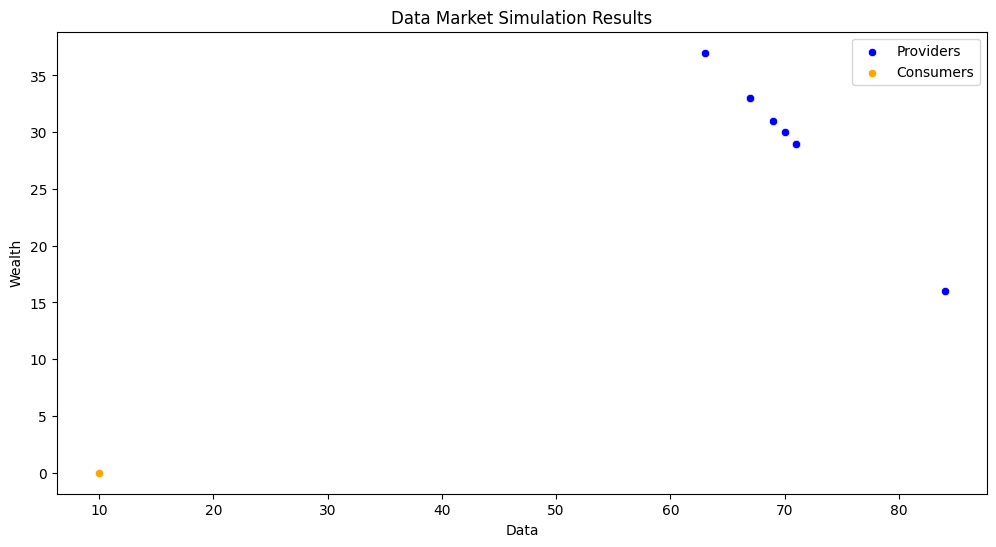

In [18]:
# visualize the results
providers_data = [(agent.data, agent.wealth) for agent in model.providers]
consumers_data = [(agent.data, agent.wealth) for agent in model.consumers]

print("Providers' Data and Wealth:", providers_data)
print("Consumers' Data and Wealth:", consumers_data)

providers_df = pd.DataFrame(providers_data, columns=['Data', 'Wealth'])
consumers_df = pd.DataFrame(consumers_data, columns=['Data', 'Wealth']) 

plt.figure(figsize=(12, 6))
sns.scatterplot(data=providers_df, x='Data', y='Wealth', label='Providers', color='blue')
sns.scatterplot(data=consumers_df, x='Data', y='Wealth', label='Consumers', color='orange')
plt.title('Data Market Simulation Results')
plt.xlabel('Data')
plt.ylabel('Wealth')
plt.legend()
plt.show()